# Kütüphaneleri İmport Etme Ve Data'yı Okuma

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Gerekli kütüphaneleri import ettim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


Veri setini yükleyelim ve DataFrame’in ilk birkaç satırını görüntüliyelim

In [8]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')  
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

**Veri setinin yapısını ve temel istatistiklerini inceleyelim**

In [9]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None
                year      co

**Eksik verilerin durumunu grafikte inceleyelim**

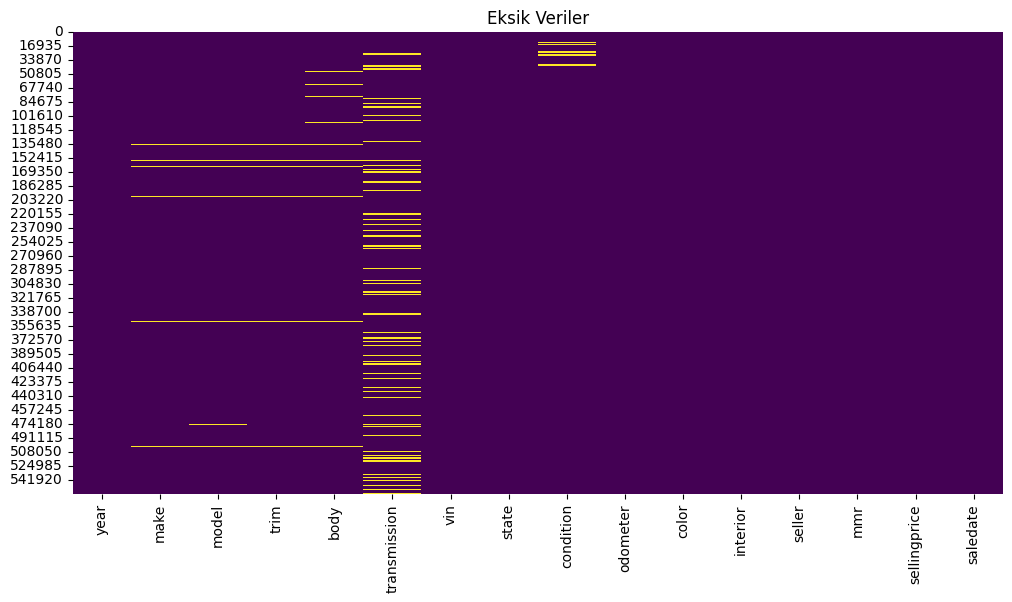

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Veriler')
plt.show()

In [11]:
# Eksik verileri kaldırmak için 
df.dropna(inplace=True)

# Kategorik değişkenleri sayısal değerlere dönüştür
le = LabelEncoder()
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Özellikleri ve hedef değişkeni ayır
X = df.drop('sellingprice', axis=1)
y = df['sellingprice']

# Eğitim ve test kümesine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Gerekli sütunları ayırıyoruz
X = df.drop(['sellingprice', 'vin', 'saledate'], axis=1)  # Bu sütunları çıkarıyoruz
y = df['sellingprice']

# Eğitim ve test kümesine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kontrol için ilk birkaç satırı yazdırıyorum

In [13]:
print(X_train.head())  

        year  make  model  trim  body  transmission  state  condition  \
51686   2013    27    534   389    35             0     29       49.0   
10090   2011    20    287   627    17             0      4       25.0   
555324  2014    36    561  1142    79             0     29       42.0   
189884  2012    18     54   578    36             0     25       36.0   
554447  2009    19    221  1034    76             0      4       35.0   

        odometer  color  interior  seller      mmr  
51686    46887.0      7         1    3096  32200.0  
10090    33309.0      1         1    7675  24300.0  
555324   18701.0     17        16    2677  20200.0  
189884   33574.0     15         6     287  15050.0  
554447   75696.0      7         6    5337   5250.0  


# Gözetimli Öğrenme Algoritmalarım
* Doğrusal Regresyon (Linear Regression)
* Karar Ağaçları (Decision Trees)

In [14]:
# Lineer Regresyon modelini eğitelim
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahmin yapalım
y_pred_lr = lr_model.predict(X_test)

# Performans değerlendirmesi
print("Lineer Regresyon - Ortalama Karesel Hata:", mean_squared_error(y_test, y_pred_lr))
print("Lineer Regresyon - Ortalama Mutlak Hata:", mean_absolute_error(y_test, y_pred_lr))

Lineer Regresyon - Ortalama Karesel Hata: 2626810.5663308753
Lineer Regresyon - Ortalama Mutlak Hata: 1038.568086210143


In [15]:
# Karar Ağaçları modelini eğitelim
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Tahmin yapalım
y_pred_dt = dt_model.predict(X_test)

# Performans değerlendirmesi
print("Karar Ağaçları - Ortalama Karesel Hata:", mean_squared_error(y_test, y_pred_dt))
print("Karar Ağaçları - Ortalama Mutlak Hata:", mean_absolute_error(y_test, y_pred_dt))

Karar Ağaçları - Ortalama Karesel Hata: 5410186.740115386
Karar Ağaçları - Ortalama Mutlak Hata: 1352.642195522151


# Gözetimsiz Öğrenme Algoritmalarım
* k-Ortalama (k-Means) Kümeleme 

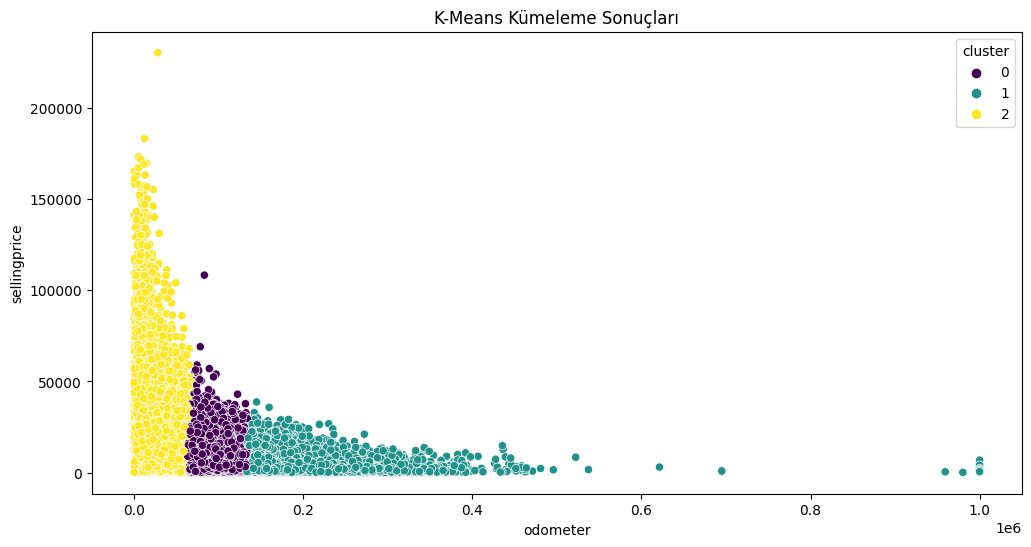

In [16]:
# K-Means modelini uygulamak için
kmeans = KMeans(n_clusters=3, n_init=10)  # n_init parametresini açıkça belirtiyoruz

# Sadece sayısal özellikleri seçelim
X_kmeans = X.select_dtypes(include=[np.number])

# Modeli eğitelim
kmeans.fit(X_kmeans)

# Küme etiketlerini ekleyelim
df['cluster'] = kmeans.labels_

# Kümeleme sonuçlarını görselleştirdim
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', hue='cluster', palette='viridis')
plt.title('K-Means Kümeleme Sonuçları')
plt.show()

In [18]:
#Lineer Regresyon sonuçlarını yazdır
print("Lineer Regresyon - Ortalama Karesel Hata:", mean_squared_error(y_test, y_pred_lr))
print("Lineer Regresyon - Ortalama Mutlak Hata:", mean_absolute_error(y_test, y_pred_lr))

# Karar Ağaçları sonuçlarını yazdır
print("Karar Ağaçları - Ortalama Karesel Hata:", mean_squared_error(y_test, y_pred_dt))
print("Karar Ağaçları - Ortalama Mutlak Hata:", mean_absolute_error(y_test, y_pred_dt))

# K-Means kümeleme sonuçlarını değerlendirmek
print(df['cluster'].value_counts())  # Her bir kümenin boyutunu yazdır


Lineer Regresyon - Ortalama Karesel Hata: 2626810.5663308753
Lineer Regresyon - Ortalama Mutlak Hata: 1038.568086210143
Karar Ağaçları - Ortalama Karesel Hata: 5410186.740115386
Karar Ağaçları - Ortalama Mutlak Hata: 1352.642195522151
cluster
2    278715
0    138986
1     54624
Name: count, dtype: int64
